### We needed to implement Logistic Regression from scratch in this question

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#importing libraries 
import pandas as pd 
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import scipy.optimize as opt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Get the files
downloaded = drive.CreateFile({'id': '13c_X4TF88JoxkJW0oJnGM-37386E7ZGa'}) # replace the id with id of file you want to access
downloaded.GetContentFile('X.npy') 

In [ ]:
downloaded = drive.CreateFile({'id': '1IaJcUJCHvmMxR28635lmDOmKW107XSlf'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Y.npy') 

In [ ]:
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label

In [ ]:
print(x_l.shape)
print(y_l.shape)
print(x_l.dtype)
print(y_l.dtype)

(2062, 64, 64)
(2062, 10)
float32
float64


In [ ]:
print(x_l)

[[[0.46666667 0.4745098  0.47843137 ... 0.5176471  0.5137255  0.5019608 ]
  [0.49803922 0.4862745  0.4862745  ... 0.5254902  0.5176471  0.50980395]
  [0.54509807 0.49411765 0.49019608 ... 0.5294118  0.5254902  0.5137255 ]
  ...
  [0.5019608  0.5137255  0.5176471  ... 0.5529412  0.54509807 0.53333336]
  [0.49803922 0.5058824  0.5137255  ... 0.54509807 0.53333336 0.52156866]
  [0.49019608 0.49803922 0.5019608  ... 0.5294118  0.52156866 0.50980395]]

 [[0.59607846 0.60784316 0.61960787 ... 0.4627451  0.4509804  0.44313726]
  [0.60784316 0.61960787 0.6313726  ... 0.4745098  0.4627451  0.4509804 ]
  [0.6156863  0.627451   0.6431373  ... 0.4862745  0.4745098  0.4627451 ]
  ...
  [0.50980395 0.5176471  0.5254902  ... 0.40392157 0.39607844 0.3882353 ]
  [0.5019608  0.50980395 0.5176471  ... 0.4        0.39215687 0.38431373]
  [0.49411765 0.5058824  0.50980395 ... 0.3882353  0.38039216 0.37254903]]

 [[0.5882353  0.6039216  0.61960787 ... 0.53333336 0.5137255  0.5019608 ]
  [0.5921569  0.611764

In [ ]:
print(y_l)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


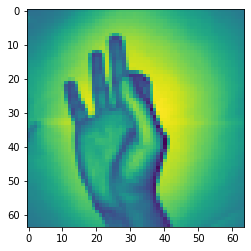

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


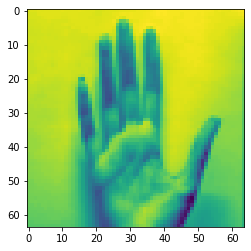

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
#viewing first and last images and their raw labels  
'''
plt.imshow(x_l[0],cmap='gray') #for viewing as grayscale image
plt.show()
'''
plt.imshow(x_l[0])
plt.show()
print(y_l[0])  

plt.imshow(x_l[len(x_l)-1])
plt.show()
print(y_l[len(y_l)-1])  


In [ ]:
#Seeing unique labels
myset=set()
for i in range(0,len(y_l)):
  for j in range(0,len(y_l[i])):
    if int(y_l[i][j])==1:
      myset.add(j)
print(myset)      

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
#considering dependent variable= value shown in label= (index at which value = 1)
totalY=[]
for i in range(0,len(y_l)):
  for j in range(0,len(y_l[i])):
    if int(y_l[i][j])==1:
      totalY.append(j)
totalY=np.array(totalY)      
print(totalY)
print(len(totalY))      

[0 0 0 ... 9 9 9]
2062


In [ ]:
#flattening x_l from 3D to 2D (2D version=totalX)
temp=[]
for i in range(0,len(x_l)):
  a=x_l[i].flatten()
  for j in range(0,len(a)):
    temp.append(float(a[j]))
print(len(temp))    

8445952


In [ ]:
totalX=np.array(temp).reshape(2062, 64*64)
totalX.shape
#flattening done

(2062, 4096)

Splitting the data

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(totalX,totalY,test_size=0.30,random_state=115) #train:test =70:30

In [ ]:
y_test

array([8, 7, 5, 3, 5, 0, 4, 5, 0, 3, 0, 6, 9, 4, 5, 3, 4, 5, 9, 3, 8, 4,
       0, 7, 7, 2, 5, 8, 9, 0, 0, 9, 8, 1, 7, 3, 5, 2, 4, 4, 3, 0, 7, 4,
       6, 8, 2, 8, 1, 5, 5, 5, 8, 2, 4, 4, 1, 8, 0, 0, 3, 2, 3, 0, 4, 1,
       3, 1, 2, 0, 9, 5, 8, 5, 2, 2, 8, 1, 5, 2, 1, 2, 7, 3, 7, 1, 0, 2,
       7, 3, 3, 2, 2, 1, 7, 9, 0, 2, 5, 9, 8, 0, 7, 2, 9, 9, 9, 7, 8, 6,
       4, 9, 9, 1, 4, 0, 8, 8, 9, 2, 8, 5, 7, 0, 1, 0, 9, 3, 3, 5, 5, 4,
       5, 8, 2, 6, 3, 9, 6, 8, 3, 7, 6, 6, 5, 3, 7, 0, 3, 6, 4, 2, 3, 9,
       1, 2, 7, 9, 9, 8, 7, 3, 0, 7, 7, 7, 2, 6, 5, 5, 0, 3, 4, 4, 1, 6,
       4, 5, 4, 6, 9, 8, 7, 9, 3, 3, 3, 1, 3, 1, 7, 0, 7, 3, 6, 6, 6, 7,
       8, 9, 4, 9, 3, 8, 0, 5, 5, 2, 0, 3, 6, 2, 2, 4, 5, 8, 4, 5, 8, 9,
       0, 7, 7, 5, 2, 4, 5, 4, 9, 4, 5, 2, 1, 4, 0, 6, 7, 5, 4, 3, 2, 2,
       1, 5, 9, 6, 1, 8, 9, 0, 9, 5, 1, 4, 9, 3, 1, 2, 5, 3, 5, 8, 5, 7,
       1, 2, 2, 8, 5, 3, 7, 1, 1, 7, 9, 0, 2, 4, 4, 1, 7, 4, 5, 5, 1, 2,
       2, 5, 2, 2, 3, 2, 8, 7, 6, 2, 3, 6, 5, 1, 2,

Diagram for the sigmoid function

In [ ]:
def sigmoid(s):  
  return 1/(1+np.exp(-s)) 

Text(0.5, 1.0, 'Sample Sigmoid curve')

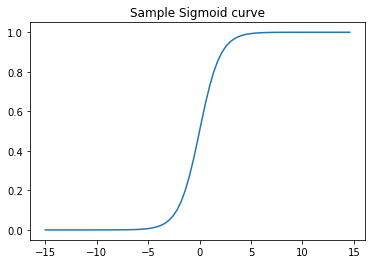

In [ ]:
x = np.arange(-15, 15, 0.4)
sig = sigmoid(x)
plt.plot(x,sig)
plt.title('Sample Sigmoid curve')

**Implementing my model for Logistic Regression**

In Logistic regression, by the help of sigmoid function, we calculate probabilities by giving some input data(known variables). Now, based on that, the model does the analysis to predict required classification.


Now, for modifying it to Multiclass classification, One-vs-all is a strategy that involves training N distinct binary classifiers, each designed to recognize a specific class. After that, we collectively use those N classifiers to predict the correct class. Now, we can code this in the following way: 
By considering one class as 1 and rest all as 0, we train the model and get the requisite weights(theta value).


We mainly need to modify the fit() function. In the fit () method we have implemented one vs Rest algorithm as here, the data set needs a multi-classification model. We are iterating the code for distinct label times and then finding out the θ values by the gradient descent method. Similarly, we are also calculating the cost() function value with respect to the corresponding θ value. After we get the optimal θ value for each label type, by the help of predict () method, we are finding the max probability for a given feature. Hence, we classify each feature input by obtaining the maximum probability for that input.

In [ ]:
#Logistic Regression for multi-class classification (one vs all)

class myLogisticRegression():
    def __init__(self, x_train, y_train , x_test, y_test, lr,epochs, reg = False,useoptimizer = False,ismultiClass = False):
        self.x_train,self.y_train,self.x_test,self.y_test,self.lr ,self.epochs,self.reg,self.useoptimizer, self.ismultiClass= x_train, y_train , x_test, y_test, lr, epochs, reg, useoptimizer,ismultiClass
        
    def sigmoid(self, s):  
        return 1/(1+np.exp(-s))  
    
    def fit(self):  #this fitting is done considering multiclass classification
        labelCount = len(np.unique(self.y_train))
        print('Total number of classes: ',labelCount) 
        self.w = np.zeros((labelCount, self.x_train.shape[1]))

        i=0            
        while i<labelCount:
            print('Training getting done for class : ',i)
            y_change = np.array([1 if i == label else 0 for label in self.y_train])
            y_test_change = np.array([1 if i == label else 0 for label in self.y_test])            
            theta = myGradientDesent( self.x_train, y_change , self.x_test, y_test_change, self.lr, self.epochs, self.reg, self.useoptimizer, self.sigmoid)
            self.w[i-1:] = theta.optimize()
            i=i+1                     
        
    def predict(self,x):    
        preds = np.argmax(self.sigmoid(np.dot(x, self.w.T)) ,axis = 1) + 1
        return preds
        

In [ ]:
class myGradientDesent():
    
    def __init__(self, x_train, y_train , x_test, y_test, lr, epochs, reg = False, useoptimizer = False, activate_fn = None):
        self.x_train,self.y_train,self.x_test,self.y_test,self.lr ,self.epochs, self.reg, self.useoptimizer, self.activate_fn  = x_train, y_train , x_test, y_test, lr,epochs, reg,useoptimizer,activate_fn
            
    def optimize(self):
        w = np.zeros(x_train.shape[1])

        if(self.useoptimizer):
            result = opt.fmin_tnc(func=self.cost, x0=w, fprime=self.gradient,args=(self.x_train, self.y_train))         
            return result[0]        
        
        return w
        

    def gradient(self,w,x_train,y_train):
        h = np.dot(x_train, w)      
        if(self.activate_fn != None):  h = self.activate_fn(h)     
        loss= h - y_train
        gradient = np.dot(x_train.T,loss)/x_train.shape[0]
        if(self.reg): gradient = gradient + np.dot((self.lr/x_train.shape[0]), w)      
        return gradient

    def cost(self,w, x_train, y_train):
        h = np.dot(x_train, w)     
        if(self.activate_fn != None):  h = self.activate_fn(h)
        loss= (np.dot(np.log(h), -y_train)) - (np.dot(np.log(1-h),1-y_train))
        loss = np.sum(loss)/x_train.shape[0]
         
        return loss

In [ ]:
mymodel = myLogisticRegression(x_train, y_train, x_test, y_test,  lr = 0.02, epochs =4000,useoptimizer=True,ismultiClass=True) #lr=learning rate
mymodel.fit()

Total number of classes:  10
Training getting done for class :  0
Training getting done for class :  1
Training getting done for class :  2
Training getting done for class :  3
Training getting done for class :  4
Training getting done for class :  5
Training getting done for class :  6
Training getting done for class :  7
Training getting done for class :  8
Training getting done for class :  9


In [ ]:
# Checking accuracy of my model
y_pred = mymodel.predict(x_test) #prediction on test data
print('Accuracy of my model on test data:')
print(accuracy_score(y_test , y_pred))

Accuracy of my model on test data:
0.6445880452342488


In [ ]:
print('Confusion Matrix (for my model): ')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix (for my model): 
[[ 0  5  1  2  4  8 10  9  3 10]
 [ 0 50  0  1  1  2  2  0  0  0]
 [ 0  0 45  2  5  7  5  0  7  0]
 [ 0  5  1 36  0  1 13  0 16  0]
 [ 0  0  0  0 52  4  1  2  3  0]
 [ 0  3  6  3  2 49  6  0  1  1]
 [ 0  3  5  7  0  3 26  1  5  2]
 [ 0  1  0  0  4  0  1 43  6  3]
 [ 0  0  1  6  7  1  2  1 41  0]
 [ 0  0  0  0  0  2  1  6  0 57]]


**Using Logistic Regression of sklearn**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel=LogisticRegression().fit(x_train,y_train)
preds=logmodel.predict(x_test) #prediction on test data

In [ ]:
# Checking accuracy of sklearn's model
print("Accuracy of sklearn's model on test data:")
print(accuracy_score(y_test , preds))

Accuracy of sklearn's model on test data:
0.7673667205169629


In [ ]:
print("Confusion Matrix (for sklearn model): ")
print(confusion_matrix(y_test,preds))

Confusion Matrix (for sklearn model): 
[[40  2  0  1  1  3  1  1  2  1]
 [ 1 50  0  0  1  0  3  0  0  1]
 [ 0  2 47  2  3  6  5  0  6  0]
 [ 0  3  1 55  0  1  7  1  4  0]
 [ 0  0  0  0 55  3  0  0  4  0]
 [ 6  2  4  3  1 47  7  0  1  0]
 [ 1  3  2 10  0  5 31  0  0  0]
 [ 1  0  0  0  2  0  1 50  2  2]
 [ 0  0  4  3  7  2  0  2 41  0]
 [ 4  1  0  0  0  1  0  1  0 59]]


Comparison of my model and sklearn model

In [ ]:
print("Accuracy of my trained model w.r.t sklearn's model:")
print(accuracy_score(preds,y_pred))

Accuracy of my trained model w.r.t sklearn's model:
0.7075928917609047


Few random pictures with their predicted and original labels

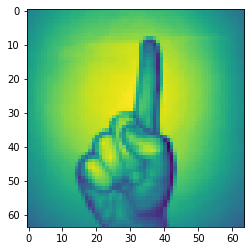

Label predicted by my model:  4
Label predicted by sklearn's model:  4
Original Label:  4



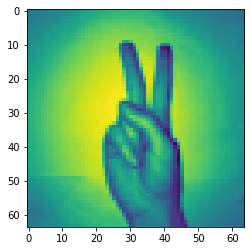

Label predicted by my model:  8
Label predicted by sklearn's model:  8
Original Label:  8



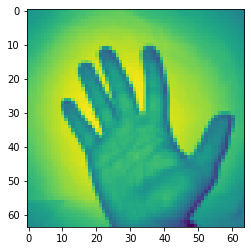

Label predicted by my model:  9
Label predicted by sklearn's model:  9
Original Label:  9



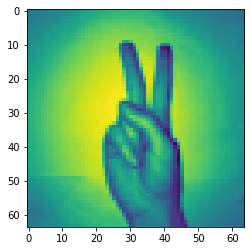

Label predicted by my model:  8
Label predicted by sklearn's model:  8
Original Label:  8



In [ ]:
import random
# will display 4 random pictures
for i in range(0,4):
  p=random.randrange(0, len(x_test), 50) #start,stop,step
  plt.imshow(x_test[p].reshape(64,64))
  plt.show()
  print("Label predicted by my model: ",y_pred[p])
  print("Label predicted by sklearn's model: ",preds[p])
  print("Original Label: ",y_test[p])
  print()
